In [90]:
import sklearn as sk
from sklearn import datasets
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
#data = np.genfromtxt("data/adult.data", delimiter=",", dtype=np.str)

In [54]:
columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o']

In [55]:
data = pd.read_csv("data/adult.data", delimiter=",", names=columns)

In [56]:
# x = data[ : ,[0,1,3,4,5,6,7,8,9,10,11,12,13,14]]

In [57]:
data.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
a    32561 non-null int64
b    32561 non-null object
c    32561 non-null int64
d    32561 non-null object
e    32561 non-null int64
f    32561 non-null object
g    32561 non-null object
h    32561 non-null object
i    32561 non-null object
j    32561 non-null object
k    32561 non-null int64
l    32561 non-null int64
m    32561 non-null int64
n    32561 non-null object
o    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [59]:
data.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
dtype: int64

In [60]:
data.head(200)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23,Private,197387,5th-6th,3,Married-civ-spouse,Transport-moving,Other-relative,White,Male,0,0,40,Mexico,<=50K
196,36,Private,99374,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,>50K
198,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K


In [61]:
encoder = OrdinalEncoder()

In [62]:
data.o = encoder.fit_transform(data.o.values.reshape(-1,1))
data.b = encoder.fit_transform(data.b.values.reshape(-1,1)) # work sector
data.d = encoder.fit_transform(data.d.values.reshape(-1,1)) # education level
data.f = encoder.fit_transform(data.f.values.reshape(-1,1)) # marital stauts
data.g = encoder.fit_transform(data.g.values.reshape(-1,1)) # work level
data.h = encoder.fit_transform(data.h.values.reshape(-1,1)) # family role
data.i = encoder.fit_transform(data.i.values.reshape(-1,1)) # race
data.j = encoder.fit_transform(data.j.values.reshape(-1,1)) # gender
data.n = encoder.fit_transform(data.n.values.reshape(-1,1)) # work sector



In [63]:
data.head(20)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
5,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
6,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0.0
7,52,6.0,209642,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,45,39.0,1.0
8,31,4.0,45781,12.0,14,4.0,10.0,1.0,4.0,0.0,14084,0,50,39.0,1.0
9,42,4.0,159449,9.0,13,2.0,4.0,0.0,4.0,1.0,5178,0,40,39.0,1.0


In [64]:
data['o'].value_counts()

0.0    24720
1.0     7841
Name: o, dtype: int64

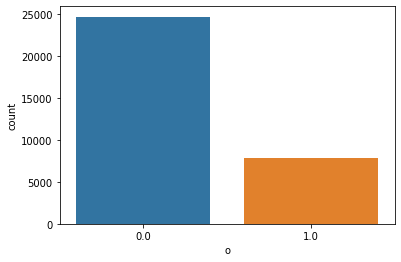

In [65]:
sns.countplot(data['o'])

In [66]:
X = data.drop('o', axis=1)
y = data['o']

In [67]:
# separate train

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 76)

In [69]:
# standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.fit_transform(X_test)


In [70]:
X_train[:5]

array([[ 0.32379587,  0.08709681,  0.33318253,  0.18218065, -0.41895638,
        -0.40697638,  1.28077882, -0.89819344,  0.39480767,  0.70090602,
        -0.14491202, -0.21776501, -0.03891865,  0.29309317],
       [-0.99716079,  0.08709681, -0.21588985, -2.66513603, -1.58516332,
         0.92237603,  0.09971568, -0.27525977,  0.39480767, -1.4267248 ,
        -0.14491202, -0.21776501, -0.03891865, -4.16727344],
       [-0.99716079,  0.08709681, -0.48040033, -0.33551329,  1.13598621,
         0.92237603,  1.28077882,  0.97060756, -3.12548566,  0.70090602,
         0.14399591, -0.21776501, -0.03891865,  0.42053222],
       [-1.29070671,  0.08709681, -0.04105369,  0.18218065, -0.41895638,
         0.92237603,  1.28077882,  0.97060756,  0.39480767, -1.4267248 ,
        -0.14491202, -0.21776501, -0.36378743,  0.29309317],
       [ 2.23184438,  2.14456144, -0.28990256,  1.21756853, -0.03022073,
         2.25172845, -1.31756009, -0.27525977,  0.39480767, -1.4267248 ,
        -0.14491202,  1.78

**Random forest**

In [81]:
rfc = RandomForestClassifier(n_estimators=300)

In [85]:
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

In [86]:
rfc_predict

array([1., 0., 0., ..., 0., 0., 1.])

In [87]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4994
         1.0       0.73      0.64      0.68      1519

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [88]:
print(confusion_matrix(y_test, rfc_predict))

[[4639  355]
 [ 547  972]]


**svm**

In [91]:
svc = svm.SVC()

In [92]:
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

In [93]:
print(classification_report(y_test, svc_predict))
print(confusion_matrix(y_test, svc_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      4994
         1.0       0.75      0.57      0.65      1519

    accuracy                           0.86      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513

[[4711  283]
 [ 647  872]]
